In [98]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
import numpy as np
from scipy import stats

In [3]:
aapl = yf.Ticker('AAPL')

In [101]:
data = aapl.history('5y','1wk','2024-1-1','2024-9-30')

print(data)

                                 Open        High         Low       Close  \
Date                                                                        
2024-01-01 00:00:00-05:00  186.442504  187.727636  179.488895  180.495071   
2024-01-08 00:00:00-05:00  181.401640  186.342896  180.813874  185.217163   
2024-01-15 00:00:00-05:00  181.471387  191.224371  179.618417  190.835846   
2024-01-22 00:00:00-05:00  191.573040  195.637618  191.214400  191.692581   
2024-01-29 00:00:00-05:00  191.284132  191.473416  178.572375  185.147430   
2024-02-05 00:00:00-05:00  187.438742  190.327789  185.137477  188.136108   
2024-02-12 00:00:00-05:00  187.947224  188.196597  180.894972  181.852554   
2024-02-19 00:00:00-05:00  181.333878  184.575724  179.548376  182.062057   
2024-02-26 00:00:00-05:00  181.782742  183.458519  176.934935  179.209213   
2024-03-04 00:00:00-05:00  175.708019  176.456138  168.067251  170.301620   
2024-03-11 00:00:00-04:00  172.506079  173.942468  169.862719  172.186874   

In [102]:
aapl_dataframe = pd.DataFrame(data)

aapl_dataframe.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-01 00:00:00-05:00,186.442504,187.727636,179.488895,180.495071,275190100,0.0,0.0
2024-01-08 00:00:00-05:00,181.401640,186.342896,180.813874,185.217163,238352300,0.0,0.0
2024-01-15 00:00:00-05:00,181.471387,191.224371,179.618417,190.835846,259667200,0.0,0.0
2024-01-22 00:00:00-05:00,191.573040,195.637618,191.214400,191.692581,255536900,0.0,0.0
2024-01-29 00:00:00-05:00,191.284132,191.473416,178.572375,185.147430,325876200,0.0,0.0


In [103]:
aapl_dataframe.shape

(39, 7)

<Axes: xlabel='Close', ylabel='Count'>

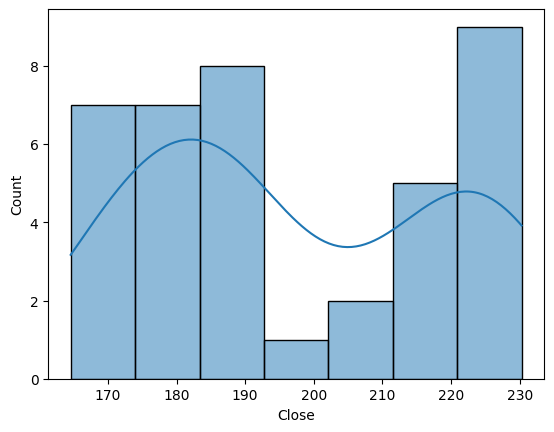

In [104]:
sns.histplot(aapl_dataframe['Close'], kde=True)

***
The data is not normally distributed.
***

In [105]:
# Training the model
model = LinearRegression()

x = np.arange(1, len(aapl_dataframe['Close'].values) + 1).reshape(-1, 1)
y = aapl_dataframe['Close'].values

model.fit(x,y)

LinearRegression()

In [106]:
# Getting my predictions
y_predictions = model.predict(x)

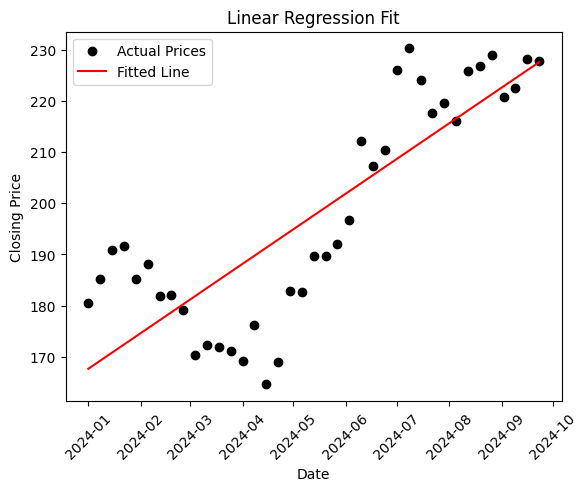

In [115]:
plt.scatter(aapl_dataframe.index, y, color='black', label='Actual Prices')
plt.plot(aapl_dataframe.index, y_predictions, color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

***
In order to make a prediction with a confidence interval, we typically need a normal distribution. Since we do not have a normal distribution, I am going to use the mean value of the residuals as the errors of the model effectively capture the behavior of the model on the data.
***

In [108]:
residuals = y_predictions - aapl_dataframe['Close']

In [109]:
r_mean = residuals.mean()

In [116]:
# Calculating the standard error
SE = aapl_dataframe['Close'].std() / np.sqrt(aapl_dataframe['Close'].shape[0])

# Calculating the confidence interval
stats.norm.interval(confidence=0.95, loc=r_mean, scale=SE)

(-6.841952100766671, 6.841952100766674)

***
These are small numbers based on the errors. What we do is add both numbers to the model's future prediction to calculate the confidence interval for the prediction.
***

In [114]:
next_x = np.array([[len(aapl_dataframe['Close']) + 1]])  # Predicting the next point
next_prediction = model.predict(next_x)

In [112]:
print(f"CI (95%):\nUpper Level: {next_prediction + 6.89259654844336}\nLower Level: {next_prediction + -6.892596548443357}")
print(f"Meaning: I can say with 95% confidence AAPL's closing price will be between {next_prediction + -6.892596548443357} and {next_prediction + 6.89259654844336} on October 1st, 2024")

CI (95%):
Upper Level: [236.06292467]
Lower Level: [222.27773157]
Meaning: I can say with 95% confidence AAPL's closing price will be between [222.27773157] and [236.06292467] on October 1st, 2024


In [113]:
aapl_data = aapl.history(start='2024-10-01', end='2024-10-02')

aapl_data = aapl_data[['Open','Close']]

aapl_data

,Open,Close
Date,,
2024-10-01 00:00:00-04:00,229.520004,226.210007


***
# Nailed it...
***

# About Me:
***

I'm Chris Woodward. I am currently seeking opportunities in Florida for data analysis/data science. I am very open to remote work and willing to relocate to another area in Florida under the right circumstances. My salary goal is $70,000 (not including benefits) for data analyst role and higher for a data science role.

You can see all my efforts for continuous learning on my LinkedIn.

[My LinkedIn Profile](https://www.linkedin.com/in/christopher-woodward-b24b43316/)